In [1]:
# TODO kato toi yks tiedosto

In [2]:
import SCEA
from cartopy import crs as ccrs, feature as cfeature
import ddeq
import os
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd

In [3]:
# Define coordinate reference systems used by the tool, the SMARTCARB model domain and the path to SMARTCARB data:

# DHDN / Soldner Berlin
CRS = ccrs.epsg(3068)  # Area of Berlin from epsg parameter dataset
WGS84 = ccrs.PlateCarree()  # Projection

DOMAIN = ddeq.misc.Domain.from_nml(
    os.path.join(os.path.dirname(ddeq.__file__), "data", "INPUT_ORG")
)

ROOT = "/project/coco2/fileshare/WP4/SMARTCARB/"
# ROOT = '/Volumes/One Touch/SMARTCARB/'

#EMISSIONS_DATA_PATH = os.path.join(ROOT, "timeseries")
#SMARTCARB_DATA_PATH = os.path.join(ROOT, "level2")
# SMARTCARB_DATA_PATH = os.path.join(ROOT, "Sentinel_7_CO2")
#SMARTCARB_MODEL_PATH = os.path.join(ROOT, "COSMO")
#TNO_MACC_III_DATA_PATH = os.path.join(ROOT, "TNO_MACC_III")

# List of all filenames
#SMARTCARB_filenames_all = os.listdir(SMARTCARB_DATA_PATH)
# print(SMARTCARB_filenames_all[:3])


# list of point sources
sources = ddeq.misc.read_point_sources()

In [4]:
#%%time

my_clusters_per_file = []
my_time_spent_per_file = []



# Print progress
#print(f"{i+1}/{len(filenames_all)} file")

# Find the data
data = ddeq.smartcarb.read_level2("/Users/eliaserv/Documents/VSCode_projects/SCEA/SCEA/Sentinel_7_CO2_2015102511_o4429_l1811.nc", no2_noise_scenario='high', only_observations=False)

# Data in proper format
lon = np.array(data['lon']).flatten()
lat = np.array(data['lat']).flatten()
no2 = np.array(data['NO2']).flatten()
not_nan = np.logical_not(np.isnan(no2))
lon = lon[not_nan]
lat = lat[not_nan]
no2 = no2[not_nan]    
points = np.transpose([lon,lat])



# Time
start_time = time.time()    

if len(points) < 10:
    my_clusters_per_file.append(np.array([]))
    my_time_spent_per_file.append(0)

# My clustering algorithm
clusters = SCEA.scea(points,
                    no2,
                    radius_func='default', 
                    n_clusters='auto',
                    point_value_threshold='stds_from_mean', 
                    stds=3.1, 
                    distance_matrix="euclidean",
                    radius_func_sigmas_threshold=1.0, 
                    max_points_in_start_radius=6, 
                    local_box_size=3,
                    verbose=False)

# Append clusters to the list
my_clusters_per_file.append(clusters)


# Time
my_time_spent_per_file.append(time.time() - start_time)
print(f"Execution time: {time.time() - start_time} seconds.")


date_now = pd.Timestamp.now().strftime("%Y-%m-%d %H:%M")
print(date_now)


# Save the clusters to a file
with open('SCEA_clusters_on_SMARTCARB_'+date_now+'.txt', 'w') as f:
    for item in my_clusters_per_file:
        f.write("%s\n" % item)

# Save the time spent to a file
with open('SCEA_time_spent_on_SMARTCARB_'+date_now+'.txt', 'w') as f:
    for item in my_time_spent_per_file:
        f.write("%s\n" % item)

Execution time: 1.1695239543914795 seconds.
2025-04-08 10:33


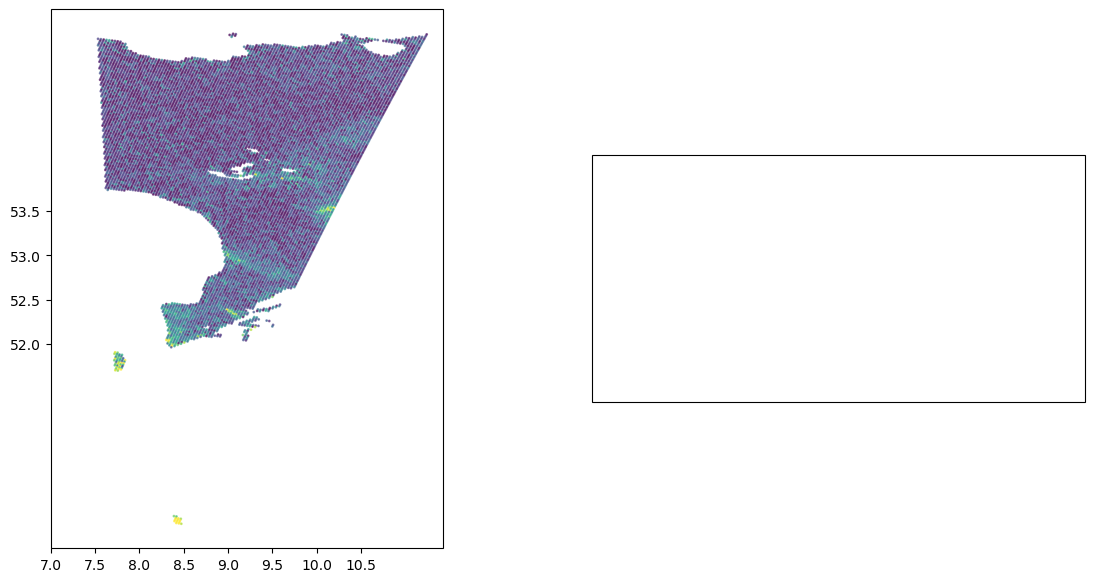

In [31]:
fig, axs = plt.subplots(1,2, figsize=(14,7,),subplot_kw={'projection': ccrs.PlateCarree()})

pcm = axs[0].scatter(lon, lat, c=no2, vmin=0, vmax=1.7e16, s=1, alpha=0.6, transform=ccrs.Geodetic())

# set x and y ticks
axs[0].set_xticks(np.arange(7, 11, 0.5), crs=WGS84)
axs[0].set_yticks(np.arange(52, 54, 0.5), crs=WGS84)


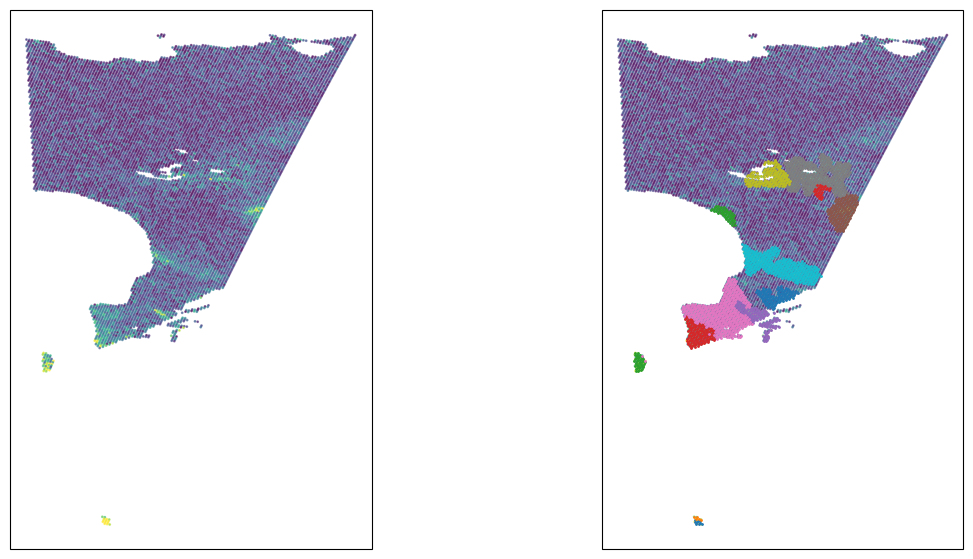

In [5]:
fig, axs = plt.subplots(1,2, figsize=(14,7,),subplot_kw={'projection': ccrs.PlateCarree()})

pcm = axs[0].scatter(lon, lat, c=no2, vmin=0, vmax=1.7e16, s=1, alpha=0.6, transform=ccrs.Geodetic())

pcm = axs[1].scatter(lon, lat, c=no2, vmin=0, vmax=1.7e16, s=1, alpha=0.6, transform=ccrs.Geodetic())

for i in range(1,int(clusters.max())+1):
    #print(i)
    pass
    axs[1].scatter(points[clusters == i][:,0], points[clusters == i][:,1], s=1)

plt.show()

In [10]:
np.unique(clusters)

# Print size of each unique cluster
for i in range(1,int(clusters.max())+1):
    print(f"Cluster {i}: {np.sum(clusters == i)} points")

Cluster 1: 9 points
Cluster 2: 4 points
Cluster 3: 41 points
Cluster 4: 144 points
Cluster 5: 129 points
Cluster 6: 173 points
Cluster 7: 477 points
Cluster 8: 414 points
Cluster 9: 159 points
Cluster 10: 375 points
Cluster 11: 119 points
Cluster 12: 1 points
Cluster 13: 53 points
Cluster 14: 32 points


In [2]:
print()
print("asdf")


asdf
